# NEURAL NETWORK FROM SCRATCH USING ONLY NUMPY

In [1]:
import numpy as np 
import pandas as pd 
import random

## Defining our dataframe:

Here I am creating the data on my own for easy understanding. The Columns are

- *X*   : A Random number between 0-100
- *Y*   : A Random number between 0-100
- Sum   : X + Y
- Class : Even is Sum is even and Odd if Sum is Odd

In [31]:
df = pd.DataFrame(np.random.randint(low=0, high=100, size=(120, 2)), columns=['X', 'Y'])

In [32]:
df['Sum'] = df['X'] + df['Y']

Assigning the classes based on whether the sum is divisible by two (Even/Odd game)

In [33]:
def classes(c):
    if c['Sum']%2 == 0:
        return 'Even'
    else:
        return 'Odd'

In [34]:
df['Class'] = df.apply(classes, axis=1)

In [35]:
df.head(2)

,X,Y,Sum,Class
0,28,68,96,Even
1,56,78,134,Even


Dropping Sum as it is an unnecessary giveaway

In [36]:
data=df.drop('Sum',axis=1)

In [37]:
data.head()

,X,Y,Class
0,28,68,Even
1,56,78,Even
2,19,6,Odd
3,43,94,Odd
4,3,72,Odd


## Converting the dataframe for processing:

- We need to convert the dataframe into a form that our neural networks can process. 
- Take the numbers X, Y of each instance and pass it into array. This is now our X_train
- We Encode the classes, Odd means 1 and Even means 0. This is now our Y_Train


In [38]:
X = data.values[:,:2]
X[:3]

array([[28, 68],
       [56, 78],
       [19, 6]], dtype=object)

In [42]:
data['Class'] = data[['Class']].replace(['Odd','Even'],[1,0])

## Split to Train and test set

Train set is used to Train and model which is then run on an unseen test set to make predictions so that we can evaluate the accuracy of the model

In [46]:
train = data[:100]
test = data[100:]

In [54]:
X_train = train.values[:,:2]
Y_train = train.values[:,2:]

In [64]:
## So now preprocessing is done
print("X train:\n",X_train[:3],"\n")
print("Y train:\n",Y_train[:3])

X train:
 [[28 68]
 [56 78]
 [19  6]] 

Y train:
 [[0]
 [0]
 [1]]


## Sigmoid Function:

A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. Often, sigmoid function refers to the special case of the logistic function. Sigmoid functions are often used in artificial neural networks to introduce nonlinearity in the model. A neural network element computes a linear combination of its input signals, and applies a sigmoid function to the result


In [48]:
def sigmoid(x, deriv = False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

## Weights and Bias assigned Randomly:

Weights and biases are the learnable parameters of your model. As well as neural networks, they appear with the same names in related models such as linear regression. Most machine learning algorithms include some learnable parameters like this.

The values of these parameters before learning starts are initialised randomly (this stops them all converging to a single value). Then when presented with data during training, they are adjusted towards values that have correct output.



In [49]:
w0 = 2*np.random.random((2, 3)) - 1 
w1 = 2*np.random.random((3, 1)) - 1
alpha = 0.1

## A Two layer Neural Network with 100000 Epoch

Epoch:  one forward pass and one backward pass of all the training examples

In [92]:
errors = []
for i in range(100000):

    #Feed forward
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    #Back propagation using gradient descent
    layer2_error = Y_train - layer2
    layer2_delta = layer2_error * sigmoid(layer2, deriv=True)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid(layer1, deriv=True)
    
    w1 += layer1.T.dot(layer2_delta) * alpha
    w0 += layer0.T.dot(layer1_delta) * alpha
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

We reach about 50% Accuracy in Training

In [93]:
accuracy

50.55417203688057

In [94]:
error

0.4944582796311942

## Plotting the error with respect to the number of epochs:

Looks like error is decreasing with the number of iterations as it should

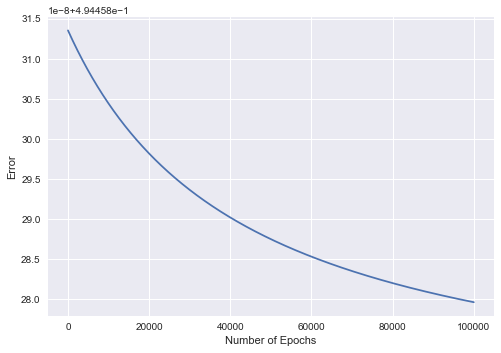

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(errors)
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.show()

## Lets try this on a test set

In [97]:
X_test = test.values[:,:2]
Y_test = test.values[:,2:]

In [109]:
total = list(range(20))

In [122]:
layer0 = X_test
layer1 = sigmoid(np.dot(layer0, w0))
layer2 = sigmoid(np.dot(layer1, w1))
X = [float(a) for a in layer2]
Y = [int(a) for a in Y_test]
prediction = pd.DataFrame({'Actual Class':Y, 'Predicted Class':X}, index=total)
prediction

,Actual Class,Predicted Class
0,0,0.561487
1,0,0.525854
2,1,0.561468
3,1,0.561487
4,1,0.561487
5,1,0.561487
6,0,0.561487
7,1,0.525854
8,0,0.525854
9,0,0.561487


## Looking at the values, I'm setting the threhold to 0.53 (Depends on you)

In [134]:
X = [float(a) for a in layer2]
X = [1 if i > 0.53 else 0 for i in X]
prediction = pd.DataFrame({'Actual Class':Y, 'Predicted Class':X}, index=total)
prediction

,Actual Class,Predicted Class
0,0,1
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,0,1
7,1,0
8,0,0
9,0,1


In [148]:
p =list(prediction['Actual Class'] == prediction['Predicted Class'])
print("Test Accuracy:",p.count(True)/len(p))

Test Accuracy: 0.55


## Train and test set accuracy are almost similar